 # 1-2-3 Track Classification


In [2]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import ATTPC_Classifier as anna

In [3]:
filenames = np.array(["output_digi_HDF_2Body.h5", "output_digi_HDF_2Body_2T.h5","output_digi_HDF_3Body.h5"])

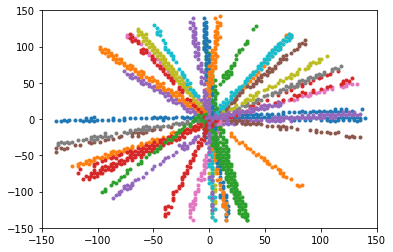

In [13]:
two = h5.File(filenames[0],'r')
three = h5.File(filenames[2],'r')

names3 = list(three.keys())

#ax=plt.axes(projection='3d')

#id= 1014
for id in range(1001,1030,2):
    evt = three['Event_['+str(id)+']']
    event = np.zeros((len(evt[:]),6))
    for i,e in enumerate(evt):
        ee = np.array(list(e))
        event[i] = np.array(ee)
        
    x = event[:,0]
    y = event[:,1]
    z = event[:,2]
    #ax.plot3D(x,y,z,'p')
    plt.plot(x,y,'.')
    plt.xlim(-150,150)
    plt.ylim(-150,150)
plt.show()



Question to Ask: What is the difference between the function imagematrix and makeImageDataset

# Making image datasets and combining the data

In [4]:
#making image data sets for two images
min2, max2 = anna.get_max_min(two)
min3, max3 = anna.get_max_min(three)
 
#print(min2, max2)

In [ ]:
anna.makeImageDataset(two, min2, max2, True)
anna.makeImageDataset(three, min3, max3, True)

#print(min2, max2, min3, max3)
#anna.plotData(three)

In [ ]:
#combining data from two images
img2 = h5.File('img2','r')
img3 = h5.File('img3','r')
anna.combineDatasets(img2, img3)

In [5]:
imgs = h5.File('CombinedTwoThree', 'r')
print(imgs.keys())
evts = imgs['imgs']
print(evts.shape)
track = imgs['targets'] #will be used to slice test_targets
print(track.shape)

<KeysViewHDF5 ['imgs', 'targets']>
(20000, 128, 128)
(20000,)


# Training and test data

In [6]:
#range of images that will be used in test and training
test_events = evts[:5000]
test_targets = track[:5000]
train_events = evts[5000:]
train_targets = track[5000:]

In [7]:
#normalizing the data
test_events = (test_events - 127.5) / 127.5
#test_targets = (test_targets - 127.5) / 127.5
train_events = (train_events - 127.5) / 127.5
#train_targets = (train_targets - 127.5) / 127.5

In [8]:
#this will make these 2d images 3d by addign an extra dimension
test_events = np.expand_dims(test_events, axis=3)
test_events = np.repeat(test_events, 3, axis=3)

#test_targets = np.expand_dims(test_targets, axis=3)

train_events = np.expand_dims(train_events, axis=3)
train_events = np.repeat(train_events, 3, axis=3)
                         
#train_targets = np.expand_dims(train_targets, axis=3)

print('Training data shape: {}'.format(train_events.shape))
print('Test data shape: {}'.format(test_events.shape))
print('Training data shape: {}'.format(train_targets.shape))
print('Test data shape: {}'.format(test_targets.shape))

Training data shape: (15000, 128, 128, 3)
Test data shape: (5000, 128, 128, 3)
Training data shape: (15000,)
Test data shape: (5000,)
